In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sort_key(path):
    return int(path.split('_')[-1])

In [3]:
fold_dir = "/home/wenkail/llm_personality/llms_mbti/evaluation/open-instruct/results/gsm/llama_13b_lora_finetune"
fold_files = os.listdir(fold_dir)
path_list = []
for subfold in fold_files:
    sub2fold = os.listdir(os.path.join(fold_dir, subfold))
    sublist = []
    for sub3fold in sub2fold:
        sublist.append(os.path.join(fold_dir, subfold, sub3fold))
        sublist.sort(key=sort_key)
    path_list.append(sublist)

In [4]:
results_dict = {}
for sub_path_list in path_list:
    for sub_path in sub_path_list:
        sub_key = sub_path.split('/')[-2]
        if sub_key not in results_dict:
            results_dict[sub_key] = []
        metrics_files = [file for file in os.listdir(sub_path) if file.startswith('metrics')]
        if metrics_files != []:
            with open(os.path.join(sub_path, metrics_files[0]), 'r') as f:
                metrics = json.load(f)['exact_match']
                results_dict[sub_key].append(metrics)

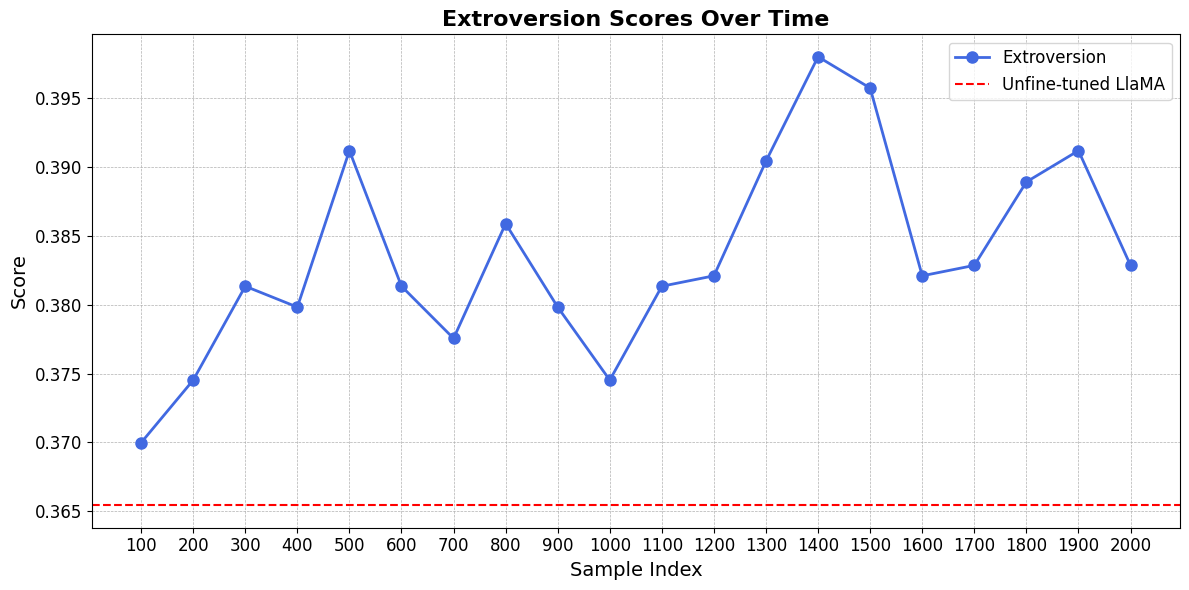

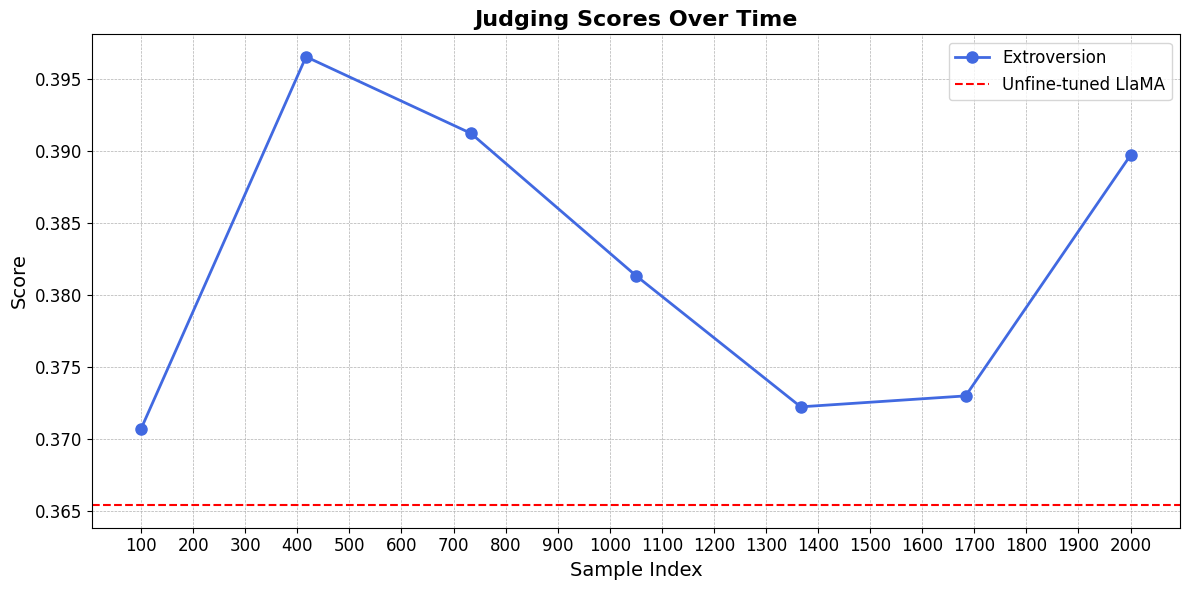

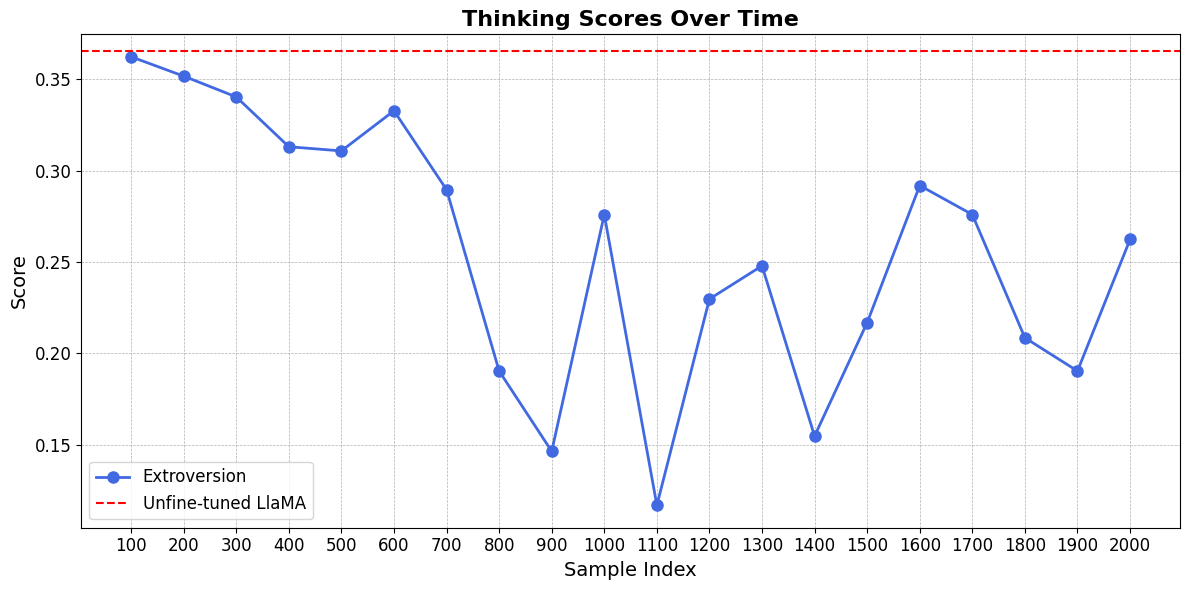

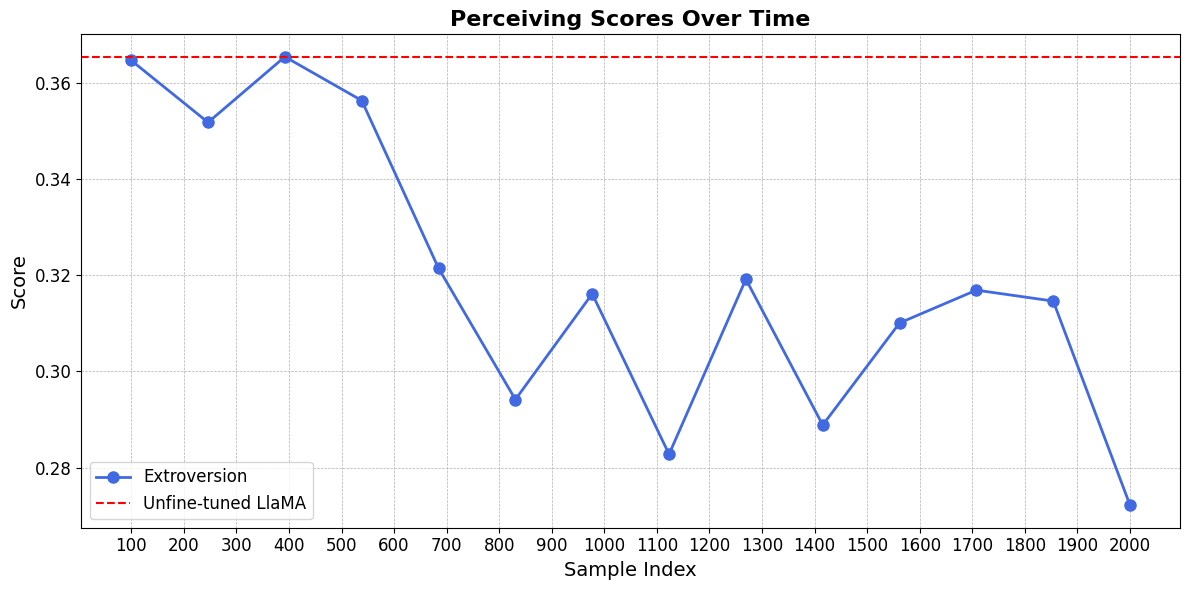

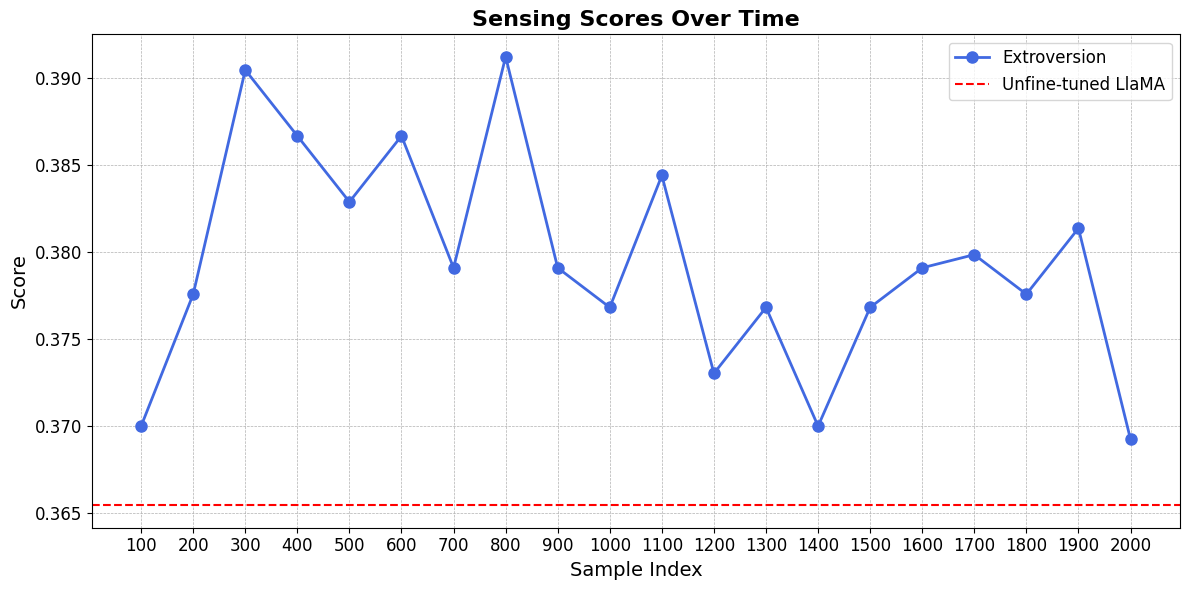

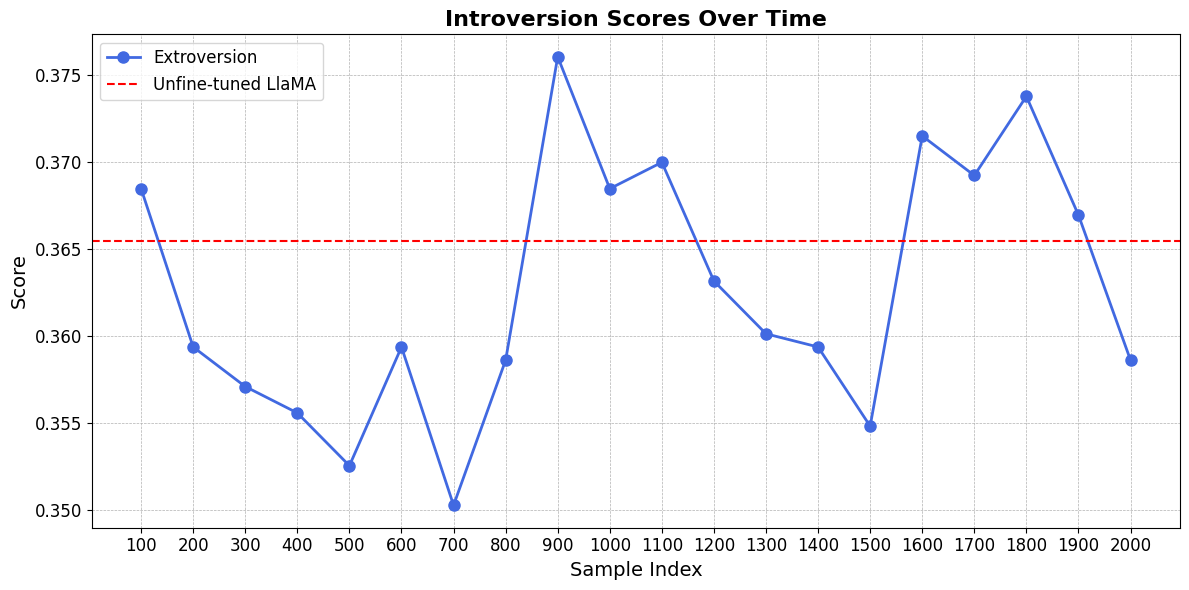

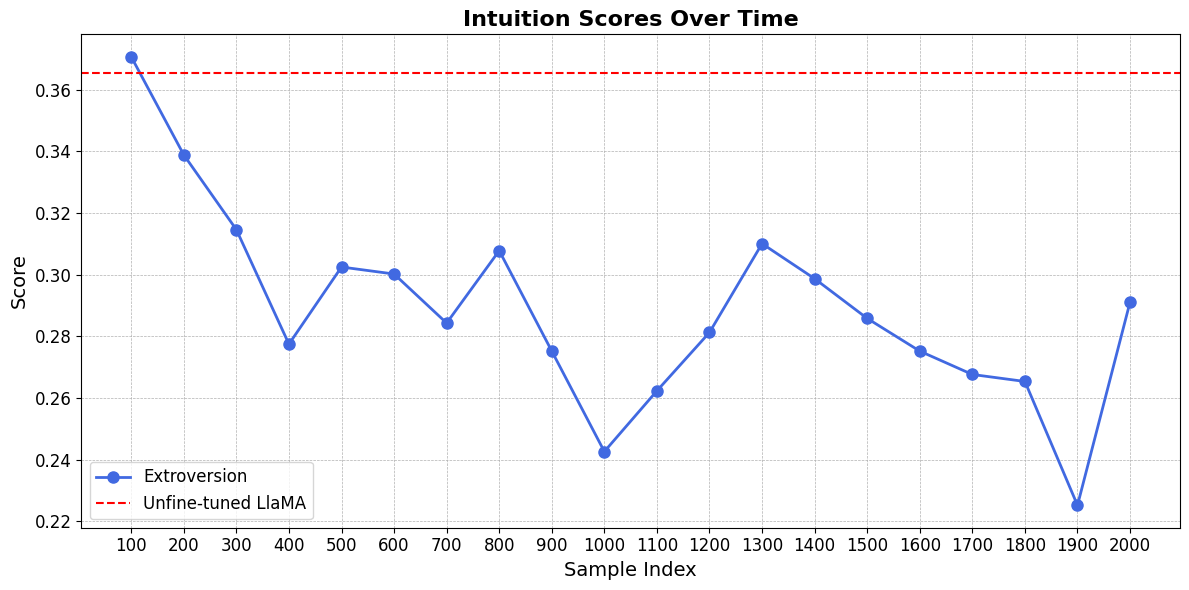

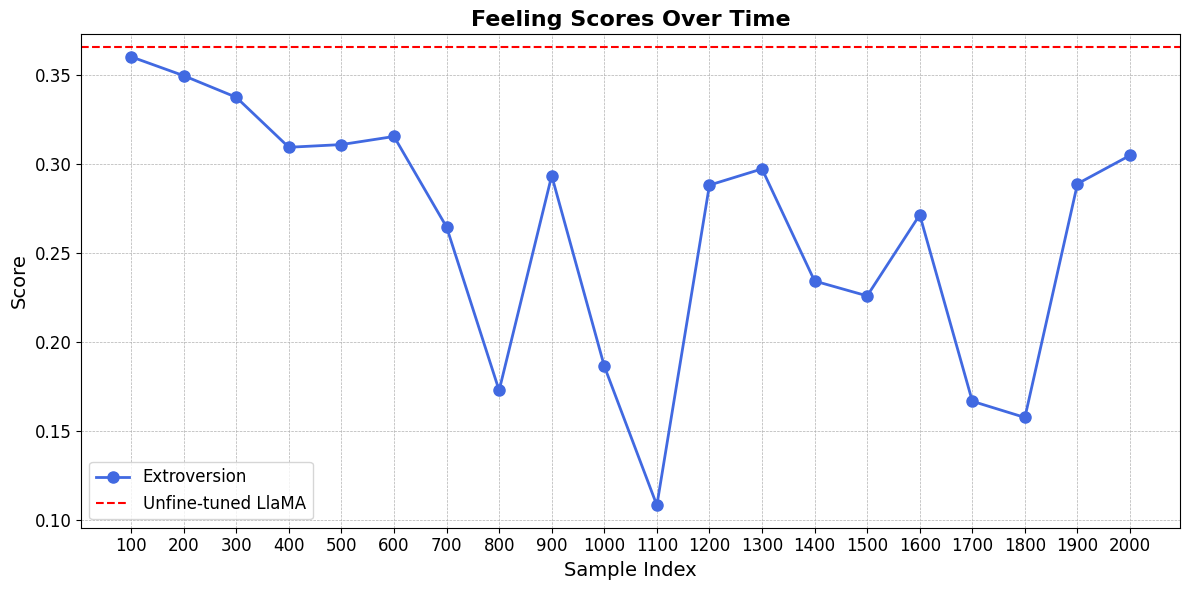

In [5]:
for key in results_dict:
    values = results_dict[key]

    plt.figure(figsize=(12, 6))
    plt.plot(values, marker='o', linestyle='-', color='royalblue', markersize=8, linewidth=2, label='Extroversion')
    plt.title(key.capitalize() + ' Scores Over Time', fontsize=16, fontweight='bold')
    plt.axhline(y=0.36542835481425323, color='r', linestyle='--', label='Unfine-tuned LlaMA')
    plt.xlabel('Sample Index', fontsize=14)
    plt.ylabel('Score', fontsize=14)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.xticks(ticks=np.linspace(0, len(values) - 1, num=20), labels=np.linspace(100, 2000, num=20, dtype=int), fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.savefig('{}_score.png'.format(key))